# HW 10-1
## Timeseries: Predicting Temperature with Recurrent Networks

For this assignment we study Recurrent Networks. We build an analyse 4 recurrent models for the task of temperature forecasting using the `jena_climate_2009_2016.csv`.


### Analysis of Models 

*N.B Experiments must be run first*

From the plots below we observe that as expected each model does inappropirately minimize the Training MAE, however the major discrepancy appears in each models ability to generalize, i.e minimization of the Validation MAE. 

The simple RNN with 32 units, and the LSTM with 8 units both minimize training and validaiton MAE uniformly. Suggesting that these models generalize well. In particular, the simple RNN with 32 units performs better than the common sense baseline null model. The baseline null model had a test MAE of 2.62, where as the simple RNN has a test MAE of 2.46. Similarly, the LSTM with 8 units performs well with a test MAE of 2.57. We observe that the LSTM with 32 units as well as the LSTM with 3 layers and 32 each over fit, this is seen in the failure to minimze validation MAE while minimization of training MAE occurs.


### Model 1: LSTM
* One layer
* 32 Units

Test MAE: 2.52

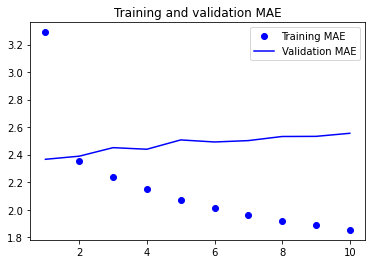

In [ ]:
import matplotlib.pyplot as plt
loss = history_1.history["mae"]
val_loss = history_1.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Model 2: Simple RNN
* One layer
* 32 Units

Test MAE: 2.46

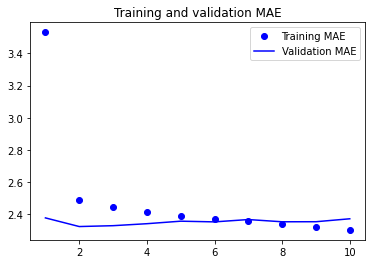

In [ ]:
import matplotlib.pyplot as plt
loss = history_2.history["mae"]
val_loss = history_2.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Model 3: LSTM
* One layer
* 8 Units

Test MAE: 2.57

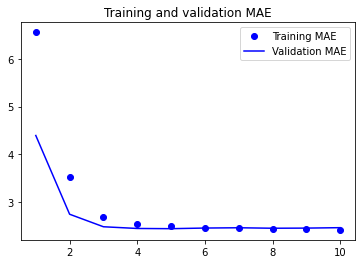

In [ ]:
import matplotlib.pyplot as plt
loss = history_3.history["mae"]
val_loss = history_3.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Model 4: LSTM
* 3 layers
* 32 Units

Test MAE: 2.77

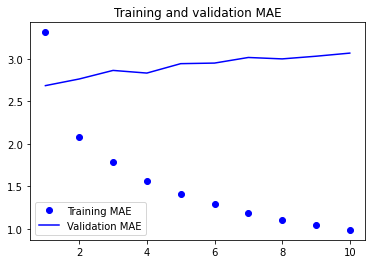

In [ ]:
import matplotlib.pyplot as plt
loss = history_4.history["mae"]
val_loss = history_4.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Experiments
### Load, Preprocess, and Split Data

In [ ]:
import os
import numpy as np

fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:] 

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

# Normalize training data
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
from tensorflow import keras

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

### Model 1: LSTM


In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

x = layers.LSTM(32)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
keras.callbacks.ModelCheckpoint("jena_lstm.keras",
save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history_1 = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 145s 173ms/step - loss: 20.9228 - mae: 3.2892 - val_loss: 9.3546 - val_mae: 2.3662
Epoch 2/10
819/819 [==============================] - 142s 173ms/step - loss: 9.1384 - mae: 2.3544 - val_loss: 9.5088 - val_mae: 2.3889
Epoch 3/10
819/819 [==============================] - 142s 173ms/step - loss: 8.2499 - mae: 2.2380 - val_loss: 10.0830 - val_mae: 2.4508
Epoch 4/10
819/819 [==============================] - 145s 176ms/step - loss: 7.5993 - mae: 2.1488 - val_loss: 10.0124 - val_mae: 2.4393
Epoch 5/10
819/819 [==============================] - 141s 172ms/step - loss: 7.0655 - mae: 2.0716 - val_loss: 10.4515 - val_mae: 2.5070
Epoch 6/10
819/819 [==============================] - 144s 176ms/step - loss: 6.6914 - mae: 2.0145 - val_loss: 10.2307 - val_mae: 2.4920
Epoch 7/10
819/819 [==============================] - 142s 173ms/step - loss: 6.3489 - mae: 1.9618 - val_loss: 10.4123 - val_mae: 2.5020
Epoch 8/10
819/819 [======================

### Model 2: Simple RNN

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

x = layers.SimpleRNN(32)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
keras.callbacks.ModelCheckpoint("jena_simplernn.keras",
save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history_2 = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_simplernn.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 81s 98ms/step - loss: 23.8792 - mae: 3.5319 - val_loss: 9.3456 - val_mae: 2.3762
Epoch 2/10
819/819 [==============================] - 82s 99ms/step - loss: 10.2285 - mae: 2.4897 - val_loss: 8.9286 - val_mae: 2.3223
Epoch 3/10
819/819 [==============================] - 82s 100ms/step - loss: 9.8441 - mae: 2.4442 - val_loss: 8.9516 - val_mae: 2.3276
Epoch 4/10
819/819 [==============================] - 85s 103ms/step - loss: 9.6070 - mae: 2.4127 - val_loss: 9.0582 - val_mae: 2.3400
Epoch 5/10
819/819 [==============================] - 84s 103ms/step - loss: 9.4208 - mae: 2.3908 - val_loss: 9.1380 - val_mae: 2.3557
Epoch 6/10
819/819 [==============================] - 80s 97ms/step - loss: 9.2667 - mae: 2.3721 - val_loss: 9.1480 - val_mae: 2.3513
Epoch 7/10
819/819 [==============================] - 81s 99ms/step - loss: 9.1360 - mae: 2.3544 - val_loss: 9.2199 - val_mae: 2.3659
Epoch 8/10
819/819 [==============================] - 82s

### Model 3: 8 unit LSTM

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

x = layers.LSTM(8)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
keras.callbacks.ModelCheckpoint("jena_lstm_8units.keras",
save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history_3 = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm_8units.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 98s 117ms/step - loss: 72.5740 - mae: 6.5633 - val_loss: 35.3520 - val_mae: 4.3918
Epoch 2/10
819/819 [==============================] - 95s 116ms/step - loss: 22.6252 - mae: 3.5137 - val_loss: 13.1241 - val_mae: 2.7361
Epoch 3/10
819/819 [==============================] - 96s 116ms/step - loss: 11.9475 - mae: 2.6706 - val_loss: 10.0375 - val_mae: 2.4727
Epoch 4/10
819/819 [==============================] - 96s 117ms/step - loss: 10.4953 - mae: 2.5279 - val_loss: 9.8006 - val_mae: 2.4367
Epoch 5/10
819/819 [==============================] - 94s 114ms/step - loss: 10.1844 - mae: 2.4878 - val_loss: 9.7192 - val_mae: 2.4323
Epoch 6/10
819/819 [==============================] - 96s 116ms/step - loss: 9.9401 - mae: 2.4561 - val_loss: 9.9009 - val_mae: 2.4455
Epoch 7/10
819/819 [==============================] - 93s 113ms/step - loss: 9.8000 - mae: 2.4374 - val_loss: 9.9473 - val_mae: 2.4516
Epoch 8/10
819/819 [===========================

### Model 4: 3 layer LSTM

In [ ]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

x = layers.LSTM(32,return_sequences=True)(inputs)
x = layers.LSTM(32,return_sequences=True)(x)
x = layers.LSTM(32,return_sequences=False)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
keras.callbacks.ModelCheckpoint("jena_lstm_3layers.keras",
save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history_4 = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm_3layers.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 360s 432ms/step - loss: 21.5891 - mae: 3.3114 - val_loss: 11.6875 - val_mae: 2.6841
Epoch 2/10
819/819 [==============================] - 360s 439ms/step - loss: 7.2434 - mae: 2.0805 - val_loss: 12.3546 - val_mae: 2.7622
Epoch 3/10
819/819 [==============================] - 360s 439ms/step - loss: 5.3681 - mae: 1.7877 - val_loss: 13.2549 - val_mae: 2.8628
Epoch 4/10
819/819 [==============================] - 362s 442ms/step - loss: 4.1622 - mae: 1.5680 - val_loss: 12.9695 - val_mae: 2.8316
Epoch 5/10
819/819 [==============================] - 359s 437ms/step - loss: 3.4033 - mae: 1.4137 - val_loss: 14.1318 - val_mae: 2.9422
Epoch 6/10
819/819 [==============================] - 362s 442ms/step - loss: 2.8215 - mae: 1.2886 - val_loss: 14.0609 - val_mae: 2.9490
Epoch 7/10
819/819 [==============================] - 357s 436ms/step - loss: 2.4048 - mae: 1.1890 - val_loss: 14.4364 - val_mae: 3.0149
Epoch 8/10
819/819 [====================

In [ ]:

model = keras.models.load_model("jena_lstm_3layers.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 66s 159ms/step - loss: 12.4225 - mae: 2.7672
Test MAE: 2.77


'/content'